# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 14308 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    1 of 14308) |           | Elapsed Time: 0:00:28 ETA:  4 days, 17:37:06

  0% (   74 of 14308) |                    | Elapsed Time: 0:00:29 ETA:  0:02:48

  1% (  146 of 14308) |                    | Elapsed Time: 0:00:30 ETA:  0:02:49

  1% (  179 of 14308) |                    | Elapsed Time: 0:00:31 ETA:  0:02:53

  1% (  243 of 14308) |                    | Elapsed Time: 0:00:32 ETA:  0:02:57

  2% (  309 of 14308) |                    | Elapsed Time: 0:00:33 ETA:  0:02:58

  2% (  358 of 14308) |                    | Elapsed Time: 0:00:33 ETA:  0:02:57

  2% (  426 of 14308) |                    | Elapsed Time: 0:00:34 ETA:  0:02:56

  3% (  493 of 14308) |                    | Elapsed Time: 0:00:35 ETA:  0:02:56

  3% (  537 of 14308) |                    | Elapsed Time: 0:00:36 ETA:  0:02:55

  4% (  605 of 14308) |                    | Elapsed Time: 0:00:37 ETA:  0:02:56

  4% (  669 of 14308) |                    | Elapsed Time: 0:00:38 ETA:  0:02:58

  5% (  716 of 14308) |#                   | Elapsed Time: 0:00:39 ETA:  0:03:00

  5% (  779 of 14308) |#                   | Elapsed Time: 0:00:40 ETA:  0:02:59

  5% (  840 of 14308) |#                   | Elapsed Time: 0:00:41 ETA:  0:03:00

  6% (  895 of 14308) |#                   | Elapsed Time: 0:00:42 ETA:  0:03:00

  6% (  961 of 14308) |#                   | Elapsed Time: 0:00:43 ETA:  0:03:00

  7% ( 1026 of 14308) |#                   | Elapsed Time: 0:00:44 ETA:  0:03:00

  7% ( 1074 of 14308) |#                   | Elapsed Time: 0:00:45 ETA:  0:03:00

  7% ( 1138 of 14308) |#                   | Elapsed Time: 0:00:46 ETA:  0:03:01

  8% ( 1198 of 14308) |#                   | Elapsed Time: 0:00:47 ETA:  0:03:02

  8% ( 1252 of 14308) |#                   | Elapsed Time: 0:00:47 ETA:  0:02:57

  9% ( 1317 of 14308) |#                   | Elapsed Time: 0:00:48 ETA:  0:02:55

  9% ( 1379 of 14308) |#                   | Elapsed Time: 0:00:49 ETA:  0:02:53

 10% ( 1431 of 14308) |##                  | Elapsed Time: 0:00:50 ETA:  0:02:54

 10% ( 1499 of 14308) |##                  | Elapsed Time: 0:00:51 ETA:  0:02:52

 10% ( 1560 of 14308) |##                  | Elapsed Time: 0:00:53 ETA:  0:03:14

 11% ( 1610 of 14308) |##                  | Elapsed Time: 0:00:54 ETA:  0:03:14

 11% ( 1671 of 14308) |##                  | Elapsed Time: 0:00:55 ETA:  0:03:15

 12% ( 1743 of 14308) |##                  | Elapsed Time: 0:00:56 ETA:  0:03:08

 12% ( 1789 of 14308) |##                  | Elapsed Time: 0:00:57 ETA:  0:03:09

 12% ( 1855 of 14308) |##                  | Elapsed Time: 0:00:58 ETA:  0:03:08

 13% ( 1912 of 14308) |##                  | Elapsed Time: 0:00:59 ETA:  0:03:09

 13% ( 1968 of 14308) |##                  | Elapsed Time: 0:00:59 ETA:  0:03:06

 14% ( 2041 of 14308) |##                  | Elapsed Time: 0:01:00 ETA:  0:03:03

 14% ( 2111 of 14308) |##                  | Elapsed Time: 0:01:01 ETA:  0:02:37

 15% ( 2147 of 14308) |###                 | Elapsed Time: 0:01:02 ETA:  0:02:34

 15% ( 2220 of 14308) |###                 | Elapsed Time: 0:01:03 ETA:  0:02:28

 16% ( 2294 of 14308) |###                 | Elapsed Time: 0:01:04 ETA:  0:02:26

 16% ( 2326 of 14308) |###                 | Elapsed Time: 0:01:04 ETA:  0:02:26

 16% ( 2398 of 14308) |###                 | Elapsed Time: 0:01:05 ETA:  0:02:22

 17% ( 2474 of 14308) |###                 | Elapsed Time: 0:01:06 ETA:  0:02:14

 17% ( 2504 of 14308) |###                 | Elapsed Time: 0:01:07 ETA:  0:02:13

 17% ( 2569 of 14308) |###                 | Elapsed Time: 0:01:08 ETA:  0:02:15

 18% ( 2637 of 14308) |###                 | Elapsed Time: 0:01:09 ETA:  0:02:15

 18% ( 2683 of 14308) |###                 | Elapsed Time: 0:01:10 ETA:  0:02:14

 19% ( 2754 of 14308) |###                 | Elapsed Time: 0:01:11 ETA:  0:02:14

 19% ( 2817 of 14308) |###                 | Elapsed Time: 0:01:12 ETA:  0:02:17

 20% ( 2862 of 14308) |####                | Elapsed Time: 0:01:12 ETA:  0:02:19

 20% ( 2932 of 14308) |####                | Elapsed Time: 0:01:13 ETA:  0:02:19

 20% ( 3000 of 14308) |####                | Elapsed Time: 0:01:14 ETA:  0:02:21

 21% ( 3041 of 14308) |####                | Elapsed Time: 0:01:15 ETA:  0:02:18

 21% ( 3114 of 14308) |####                | Elapsed Time: 0:01:16 ETA:  0:02:14

 22% ( 3183 of 14308) |####                | Elapsed Time: 0:01:17 ETA:  0:02:12

 22% ( 3220 of 14308) |####                | Elapsed Time: 0:01:18 ETA:  0:02:11

 23% ( 3294 of 14308) |####                | Elapsed Time: 0:01:19 ETA:  0:02:09

 23% ( 3368 of 14308) |####                | Elapsed Time: 0:01:20 ETA:  0:02:04

 23% ( 3399 of 14308) |####                | Elapsed Time: 0:01:20 ETA:  0:02:00

 24% ( 3472 of 14308) |####                | Elapsed Time: 0:01:21 ETA:  0:01:58

 24% ( 3543 of 14308) |####                | Elapsed Time: 0:01:22 ETA:  0:01:56

 25% ( 3577 of 14308) |#####               | Elapsed Time: 0:01:23 ETA:  0:01:59

 25% ( 3649 of 14308) |#####               | Elapsed Time: 0:01:24 ETA:  0:01:58

 26% ( 3723 of 14308) |#####               | Elapsed Time: 0:01:25 ETA:  0:01:55

 26% ( 3756 of 14308) |#####               | Elapsed Time: 0:01:25 ETA:  0:01:54

 26% ( 3826 of 14308) |#####               | Elapsed Time: 0:01:26 ETA:  0:01:54

 27% ( 3887 of 14308) |#####               | Elapsed Time: 0:01:27 ETA:  0:01:58

 27% ( 3935 of 14308) |#####               | Elapsed Time: 0:01:28 ETA:  0:02:00

 28% ( 4007 of 14308) |#####               | Elapsed Time: 0:01:29 ETA:  0:02:00

 28% ( 4076 of 14308) |#####               | Elapsed Time: 0:01:30 ETA:  0:01:59

 28% ( 4114 of 14308) |#####               | Elapsed Time: 0:01:30 ETA:  0:01:59

 29% ( 4180 of 14308) |#####               | Elapsed Time: 0:01:32 ETA:  0:02:01

 29% ( 4252 of 14308) |#####               | Elapsed Time: 0:01:33 ETA:  0:02:01

 30% ( 4293 of 14308) |######              | Elapsed Time: 0:01:33 ETA:  0:02:01

 30% ( 4361 of 14308) |######              | Elapsed Time: 0:01:34 ETA:  0:02:00

 30% ( 4425 of 14308) |######              | Elapsed Time: 0:01:35 ETA:  0:01:58

 31% ( 4472 of 14308) |######              | Elapsed Time: 0:01:36 ETA:  0:01:56

 31% ( 4541 of 14308) |######              | Elapsed Time: 0:01:37 ETA:  0:01:56

 32% ( 4607 of 14308) |######              | Elapsed Time: 0:01:38 ETA:  0:01:56

 32% ( 4651 of 14308) |######              | Elapsed Time: 0:01:38 ETA:  0:01:52

 32% ( 4716 of 14308) |######              | Elapsed Time: 0:01:39 ETA:  0:01:52

 33% ( 4772 of 14308) |######              | Elapsed Time: 0:01:41 ETA:  0:02:23

 33% ( 4829 of 14308) |######              | Elapsed Time: 0:01:42 ETA:  0:02:23

 34% ( 4897 of 14308) |######              | Elapsed Time: 0:01:43 ETA:  0:02:22

 34% ( 4960 of 14308) |######              | Elapsed Time: 0:01:44 ETA:  0:02:21

 35% ( 5008 of 14308) |#######             | Elapsed Time: 0:01:45 ETA:  0:02:23

 35% ( 5075 of 14308) |#######             | Elapsed Time: 0:01:46 ETA:  0:02:22

 35% ( 5138 of 14308) |#######             | Elapsed Time: 0:01:47 ETA:  0:02:23

 36% ( 5187 of 14308) |#######             | Elapsed Time: 0:01:48 ETA:  0:02:21

 36% ( 5254 of 14308) |#######             | Elapsed Time: 0:01:49 ETA:  0:02:19

 37% ( 5317 of 14308) |#######             | Elapsed Time: 0:01:50 ETA:  0:01:50

 37% ( 5366 of 14308) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:50

 37% ( 5436 of 14308) |#######             | Elapsed Time: 0:01:52 ETA:  0:01:48

 38% ( 5508 of 14308) |#######             | Elapsed Time: 0:01:53 ETA:  0:01:44

 38% ( 5545 of 14308) |#######             | Elapsed Time: 0:01:53 ETA:  0:01:40

 39% ( 5617 of 14308) |#######             | Elapsed Time: 0:01:54 ETA:  0:01:37

 39% ( 5683 of 14308) |#######             | Elapsed Time: 0:01:55 ETA:  0:01:35

 40% ( 5724 of 14308) |########            | Elapsed Time: 0:01:56 ETA:  0:01:36

 40% ( 5792 of 14308) |########            | Elapsed Time: 0:01:57 ETA:  0:01:35

 40% ( 5863 of 14308) |########            | Elapsed Time: 0:01:58 ETA:  0:01:31

 41% ( 5903 of 14308) |########            | Elapsed Time: 0:01:58 ETA:  0:01:28

 41% ( 5971 of 14308) |########            | Elapsed Time: 0:01:59 ETA:  0:01:28

 42% ( 6038 of 14308) |########            | Elapsed Time: 0:02:00 ETA:  0:01:29

 42% ( 6081 of 14308) |########            | Elapsed Time: 0:02:01 ETA:  0:01:29

 43% ( 6155 of 14308) |########            | Elapsed Time: 0:02:02 ETA:  0:01:27

 43% ( 6227 of 14308) |########            | Elapsed Time: 0:02:03 ETA:  0:01:24

 43% ( 6260 of 14308) |########            | Elapsed Time: 0:02:04 ETA:  0:01:21

 44% ( 6330 of 14308) |########            | Elapsed Time: 0:02:05 ETA:  0:01:19

 44% ( 6401 of 14308) |########            | Elapsed Time: 0:02:06 ETA:  0:01:18

 45% ( 6439 of 14308) |#########           | Elapsed Time: 0:02:06 ETA:  0:01:17

 45% ( 6507 of 14308) |#########           | Elapsed Time: 0:02:07 ETA:  0:01:16

 45% ( 6577 of 14308) |#########           | Elapsed Time: 0:02:08 ETA:  0:01:14

 46% ( 6618 of 14308) |#########           | Elapsed Time: 0:02:09 ETA:  0:01:13

 46% ( 6686 of 14308) |#########           | Elapsed Time: 0:02:10 ETA:  0:01:15

 47% ( 6754 of 14308) |#########           | Elapsed Time: 0:02:11 ETA:  0:01:15

 47% ( 6797 of 14308) |#########           | Elapsed Time: 0:02:11 ETA:  0:01:17

 47% ( 6863 of 14308) |#########           | Elapsed Time: 0:02:12 ETA:  0:01:18

 48% ( 6933 of 14308) |#########           | Elapsed Time: 0:02:13 ETA:  0:01:18

 48% ( 6976 of 14308) |#########           | Elapsed Time: 0:02:14 ETA:  0:01:18

 49% ( 7040 of 14308) |#########           | Elapsed Time: 0:02:15 ETA:  0:01:18

 49% ( 7108 of 14308) |#########           | Elapsed Time: 0:02:16 ETA:  0:01:18

 50% ( 7154 of 14308) |##########          | Elapsed Time: 0:02:17 ETA:  0:01:18

 50% ( 7223 of 14308) |##########          | Elapsed Time: 0:02:18 ETA:  0:01:17

 50% ( 7282 of 14308) |##########          | Elapsed Time: 0:02:19 ETA:  0:01:19

 51% ( 7333 of 14308) |##########          | Elapsed Time: 0:02:20 ETA:  0:01:18

 51% ( 7403 of 14308) |##########          | Elapsed Time: 0:02:21 ETA:  0:01:15

 52% ( 7475 of 14308) |##########          | Elapsed Time: 0:02:22 ETA:  0:01:14

 52% ( 7512 of 14308) |##########          | Elapsed Time: 0:02:22 ETA:  0:01:14

 52% ( 7576 of 14308) |##########          | Elapsed Time: 0:02:23 ETA:  0:01:12

 53% ( 7638 of 14308) |##########          | Elapsed Time: 0:02:24 ETA:  0:01:14

 53% ( 7691 of 14308) |##########          | Elapsed Time: 0:02:25 ETA:  0:01:17

 54% ( 7757 of 14308) |##########          | Elapsed Time: 0:02:26 ETA:  0:01:17

 54% ( 7821 of 14308) |##########          | Elapsed Time: 0:02:27 ETA:  0:01:14

 55% ( 7870 of 14308) |###########         | Elapsed Time: 0:02:28 ETA:  0:01:13

 55% ( 7942 of 14308) |###########         | Elapsed Time: 0:02:29 ETA:  0:01:11

 55% ( 8010 of 14308) |###########         | Elapsed Time: 0:02:30 ETA:  0:01:12

 56% ( 8049 of 14308) |###########         | Elapsed Time: 0:02:31 ETA:  0:01:11

 56% ( 8119 of 14308) |###########         | Elapsed Time: 0:02:32 ETA:  0:01:07

 57% ( 8187 of 14308) |###########         | Elapsed Time: 0:02:33 ETA:  0:01:04

 57% ( 8228 of 14308) |###########         | Elapsed Time: 0:02:33 ETA:  0:00:57

 57% ( 8292 of 14308) |###########         | Elapsed Time: 0:02:34 ETA:  0:00:57

 58% ( 8359 of 14308) |###########         | Elapsed Time: 0:02:35 ETA:  0:00:55

 58% ( 8406 of 14308) |###########         | Elapsed Time: 0:02:36 ETA:  0:00:56

 59% ( 8465 of 14308) |###########         | Elapsed Time: 0:02:37 ETA:  0:01:00

 59% ( 8521 of 14308) |###########         | Elapsed Time: 0:02:38 ETA:  0:01:04

 60% ( 8585 of 14308) |############        | Elapsed Time: 0:02:39 ETA:  0:01:08

 60% ( 8644 of 14308) |############        | Elapsed Time: 0:02:40 ETA:  0:01:11

 60% ( 8701 of 14308) |############        | Elapsed Time: 0:02:41 ETA:  0:01:16

 61% ( 8731 of 14308) |############        | Elapsed Time: 0:02:43 ETA:  0:02:07

 61% ( 8764 of 14308) |############        | Elapsed Time: 0:02:44 ETA:  0:02:15

 61% ( 8826 of 14308) |############        | Elapsed Time: 0:02:45 ETA:  0:02:11

 62% ( 8889 of 14308) |############        | Elapsed Time: 0:02:46 ETA:  0:02:07

 62% ( 8943 of 14308) |############        | Elapsed Time: 0:02:46 ETA:  0:02:00

 62% ( 9009 of 14308) |############        | Elapsed Time: 0:02:47 ETA:  0:01:57

 63% ( 9071 of 14308) |############        | Elapsed Time: 0:02:48 ETA:  0:01:49

 63% ( 9122 of 14308) |############        | Elapsed Time: 0:02:49 ETA:  0:01:47

 64% ( 9181 of 14308) |############        | Elapsed Time: 0:02:50 ETA:  0:01:44

 64% ( 9247 of 14308) |############        | Elapsed Time: 0:02:51 ETA:  0:00:55

 65% ( 9301 of 14308) |#############       | Elapsed Time: 0:02:52 ETA:  0:00:54

 65% ( 9360 of 14308) |#############       | Elapsed Time: 0:02:53 ETA:  0:00:54

 65% ( 9419 of 14308) |#############       | Elapsed Time: 0:02:54 ETA:  0:00:55

 66% ( 9480 of 14308) |#############       | Elapsed Time: 0:02:55 ETA:  0:00:53

 66% ( 9550 of 14308) |#############       | Elapsed Time: 0:02:56 ETA:  0:00:50

 67% ( 9620 of 14308) |#############       | Elapsed Time: 0:02:57 ETA:  0:00:45

 67% ( 9658 of 14308) |#############       | Elapsed Time: 0:02:57 ETA:  0:00:42

 67% ( 9729 of 14308) |#############       | Elapsed Time: 0:02:58 ETA:  0:00:36

 68% ( 9798 of 14308) |#############       | Elapsed Time: 0:02:59 ETA:  0:00:34

 68% ( 9837 of 14308) |#############       | Elapsed Time: 0:03:00 ETA:  0:00:35

 69% ( 9895 of 14308) |#############       | Elapsed Time: 0:03:01 ETA:  0:00:34

 69% ( 9960 of 14308) |#############       | Elapsed Time: 0:03:02 ETA:  0:00:31

 70% (10016 of 14308) |##############      | Elapsed Time: 0:03:03 ETA:  0:00:32

 70% (10081 of 14308) |##############      | Elapsed Time: 0:03:04 ETA:  0:00:34

 70% (10146 of 14308) |##############      | Elapsed Time: 0:03:05 ETA:  0:00:35

 71% (10195 of 14308) |##############      | Elapsed Time: 0:03:06 ETA:  0:00:37

 71% (10262 of 14308) |##############      | Elapsed Time: 0:03:07 ETA:  0:00:38

 72% (10314 of 14308) |##############      | Elapsed Time: 0:03:08 ETA:  0:00:45

 72% (10374 of 14308) |##############      | Elapsed Time: 0:03:09 ETA:  0:00:42

 72% (10437 of 14308) |##############      | Elapsed Time: 0:03:10 ETA:  0:00:39

 73% (10498 of 14308) |##############      | Elapsed Time: 0:03:11 ETA:  0:00:40

 73% (10553 of 14308) |##############      | Elapsed Time: 0:03:12 ETA:  0:00:41

 74% (10607 of 14308) |##############      | Elapsed Time: 0:03:13 ETA:  0:00:45

 74% (10672 of 14308) |##############      | Elapsed Time: 0:03:14 ETA:  0:00:43

 75% (10731 of 14308) |###############     | Elapsed Time: 0:03:15 ETA:  0:00:41

 75% (10795 of 14308) |###############     | Elapsed Time: 0:03:16 ETA:  0:00:41

 75% (10851 of 14308) |###############     | Elapsed Time: 0:03:17 ETA:  0:00:38

 76% (10910 of 14308) |###############     | Elapsed Time: 0:03:18 ETA:  0:00:37

 76% (10973 of 14308) |###############     | Elapsed Time: 0:03:19 ETA:  0:00:36

 77% (11036 of 14308) |###############     | Elapsed Time: 0:03:20 ETA:  0:00:35

 77% (11089 of 14308) |###############     | Elapsed Time: 0:03:21 ETA:  0:00:33

 77% (11151 of 14308) |###############     | Elapsed Time: 0:03:22 ETA:  0:00:28

 78% (11207 of 14308) |###############     | Elapsed Time: 0:03:23 ETA:  0:00:31

 78% (11268 of 14308) |###############     | Elapsed Time: 0:03:24 ETA:  0:00:30

 79% (11326 of 14308) |###############     | Elapsed Time: 0:03:25 ETA:  0:00:32

 79% (11391 of 14308) |###############     | Elapsed Time: 0:03:26 ETA:  0:00:27

 80% (11447 of 14308) |################    | Elapsed Time: 0:03:26 ETA:  0:00:24

 80% (11510 of 14308) |################    | Elapsed Time: 0:03:27 ETA:  0:00:23

 80% (11576 of 14308) |################    | Elapsed Time: 0:03:28 ETA:  0:00:21

 81% (11626 of 14308) |################    | Elapsed Time: 0:03:29 ETA:  0:00:19

 81% (11689 of 14308) |################    | Elapsed Time: 0:03:30 ETA:  0:00:18

 82% (11750 of 14308) |################    | Elapsed Time: 0:03:31 ETA:  0:00:15

 82% (11805 of 14308) |################    | Elapsed Time: 0:03:32 ETA:  0:00:14

 82% (11875 of 14308) |################    | Elapsed Time: 0:03:33 ETA:  0:00:08

 83% (11945 of 14308) |################    | Elapsed Time: 0:03:34 ETA:  0:00:06

 83% (11983 of 14308) |################    | Elapsed Time: 0:03:35 ETA:  0:00:06

 84% (12052 of 14308) |################    | Elapsed Time: 0:03:36 ETA:  0:00:02

 84% (12111 of 14308) |################    | Elapsed Time: 0:03:37 ETA:  0:00:04

 85% (12162 of 14308) |#################   | Elapsed Time: 0:03:38 ETA:  0:00:03

 85% (12232 of 14308) |#################   | Elapsed Time: 0:03:39 ETA:  0:00:00

 85% (12302 of 14308) |#################   | Elapsed Time: 0:03:40 ETA:  0:00:00

 86% (12341 of 14308) |#################   | Elapsed Time: 0:03:40 ETA:  0:00:00

 86% (12413 of 14308) |#################   | Elapsed Time: 0:03:41 ETA:  0:00:00

 87% (12479 of 14308) |#################   | Elapsed Time: 0:03:42 ETA:  0:00:00

 87% (12520 of 14308) |#################   | Elapsed Time: 0:03:43 ETA:  0:00:00

 87% (12586 of 14308) |#################   | Elapsed Time: 0:03:44 ETA:  0:00:00

 88% (12650 of 14308) |#################   | Elapsed Time: 0:03:45 ETA:  0:00:00

 88% (12699 of 14308) |#################   | Elapsed Time: 0:03:46 ETA:  0:00:00

 89% (12759 of 14308) |#################   | Elapsed Time: 0:03:47 ETA:  0:00:00

 89% (12817 of 14308) |#################   | Elapsed Time: 0:03:48 ETA:  0:00:00

 90% (12878 of 14308) |##################  | Elapsed Time: 0:03:48 ETA:  0:00:00

 90% (12943 of 14308) |##################  | Elapsed Time: 0:03:49 ETA:  0:00:00

 90% (13002 of 14308) |##################  | Elapsed Time: 0:03:51 ETA:  0:00:00

 91% (13057 of 14308) |##################  | Elapsed Time: 0:03:51 ETA:  0:00:01

 91% (13118 of 14308) |##################  | Elapsed Time: 0:03:52 ETA:  0:00:02

 92% (13183 of 14308) |##################  | Elapsed Time: 0:03:53 ETA:  0:00:00

 92% (13235 of 14308) |##################  | Elapsed Time: 0:03:54 ETA:  0:00:00

 92% (13294 of 14308) |##################  | Elapsed Time: 0:03:55 ETA:  0:00:00

 93% (13349 of 14308) |##################  | Elapsed Time: 0:03:56 ETA:  0:00:00

 93% (13414 of 14308) |##################  | Elapsed Time: 0:03:58 ETA:  0:00:05

 94% (13474 of 14308) |##################  | Elapsed Time: 0:03:59 ETA:  0:00:04

 94% (13539 of 14308) |##################  | Elapsed Time: 0:04:00 ETA:  0:00:00

 95% (13593 of 14308) |################### | Elapsed Time: 0:04:02 ETA:  0:01:05

 95% (13649 of 14308) |################### | Elapsed Time: 0:04:03 ETA:  0:01:06

 95% (13709 of 14308) |################### | Elapsed Time: 0:04:04 ETA:  0:01:04

 96% (13772 of 14308) |################### | Elapsed Time: 0:04:05 ETA:  0:01:10

 96% (13829 of 14308) |################### | Elapsed Time: 0:04:06 ETA:  0:01:02

 97% (13888 of 14308) |################### | Elapsed Time: 0:04:07 ETA:  0:01:01

 97% (13951 of 14308) |################### | Elapsed Time: 0:04:08 ETA:  0:01:00

 97% (14021 of 14308) |################### | Elapsed Time: 0:04:09 ETA:  0:00:00

 98% (14090 of 14308) |################### | Elapsed Time: 0:04:10 ETA:  0:00:00

 98% (14130 of 14308) |################### | Elapsed Time: 0:04:11 ETA:  0:00:00

 99% (14190 of 14308) |################### | Elapsed Time: 0:04:12 ETA:  0:00:00

 99% (14247 of 14308) |################### | Elapsed Time: 0:04:13 ETA:  0:00:00

100% (14308 of 14308) |####################| Elapsed Time: 0:04:14 Time: 0:04:14


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

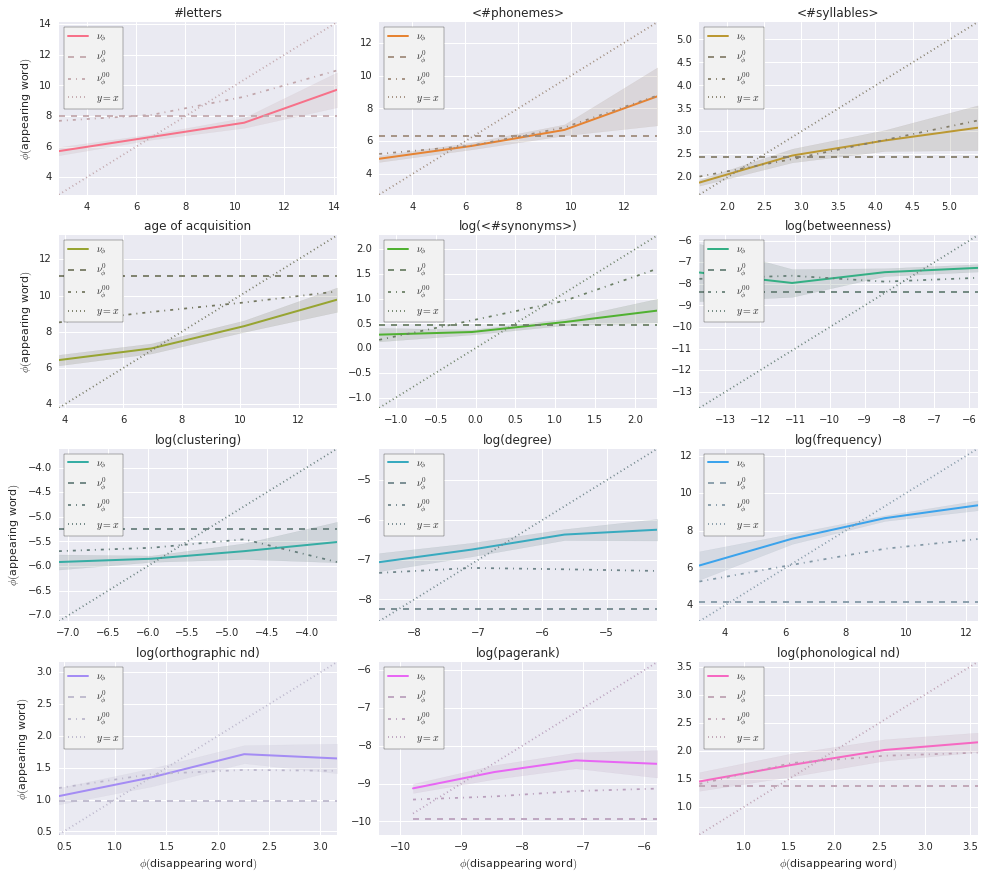

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

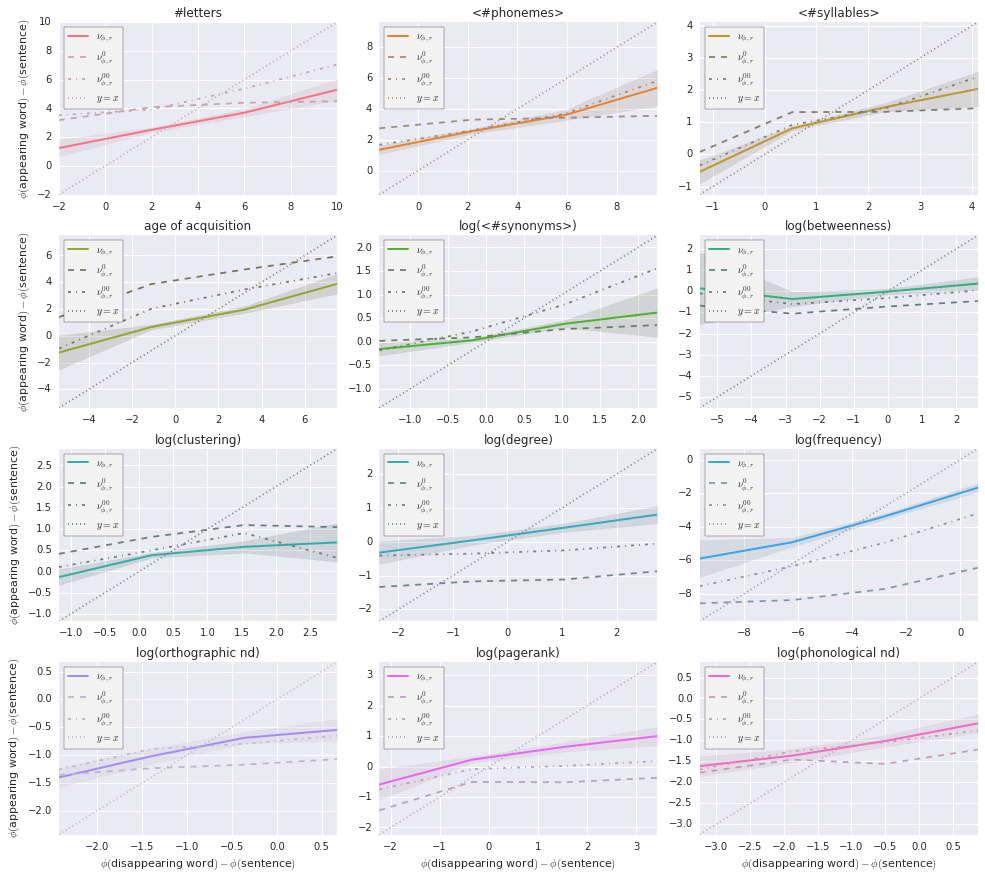

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

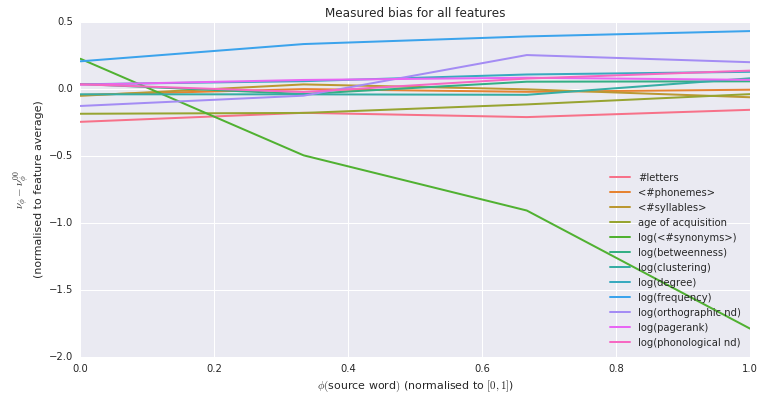

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

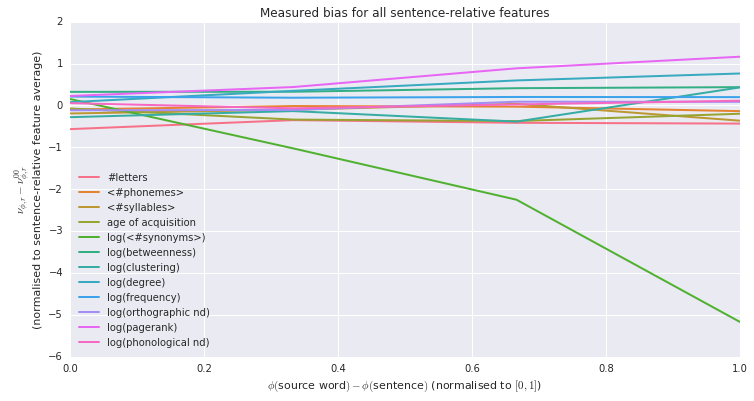

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

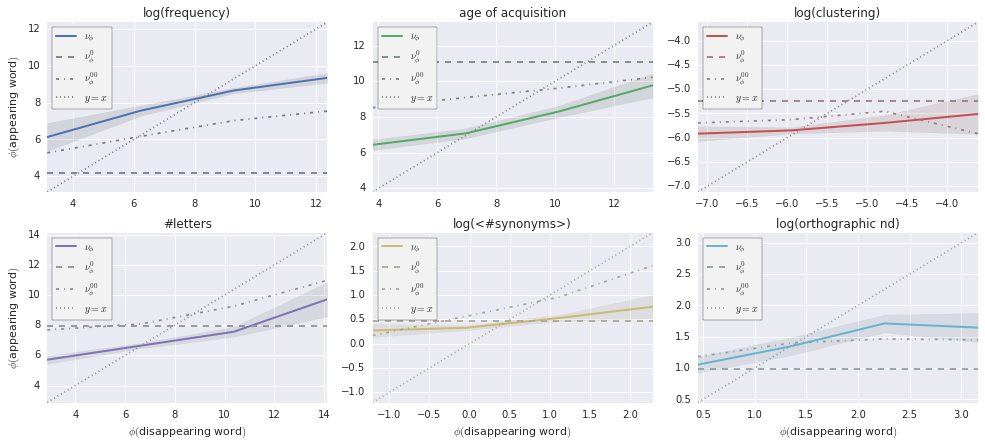

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

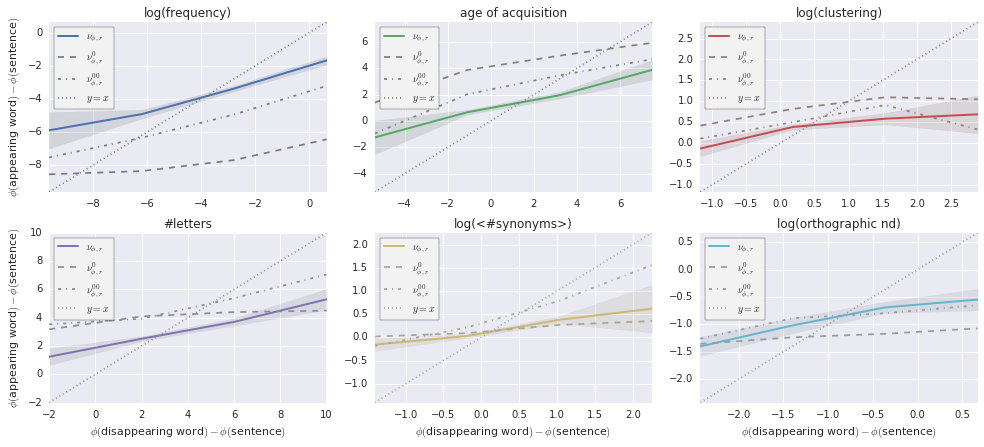

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

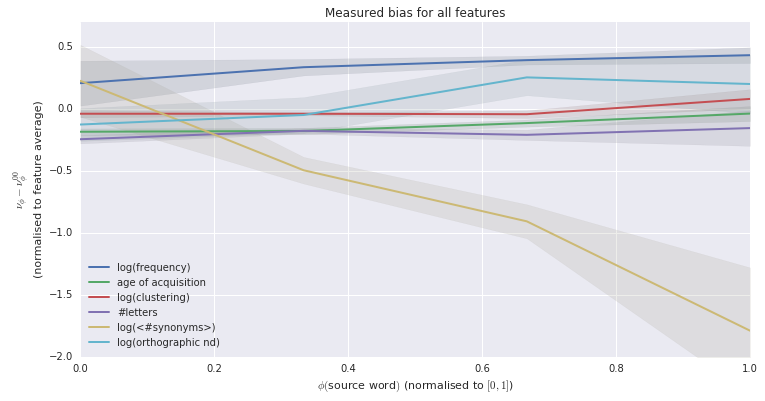

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

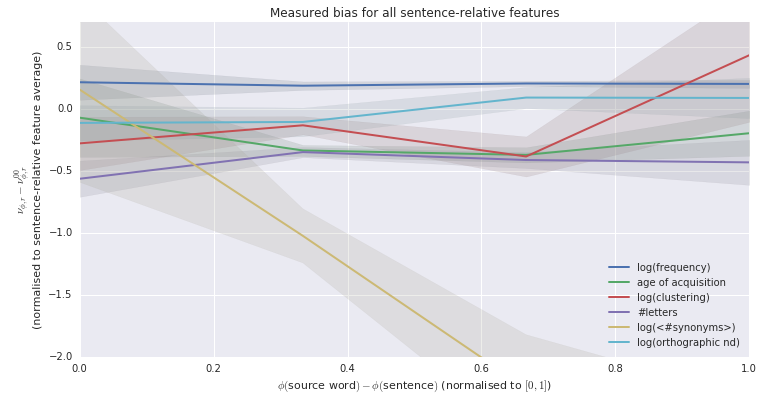

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


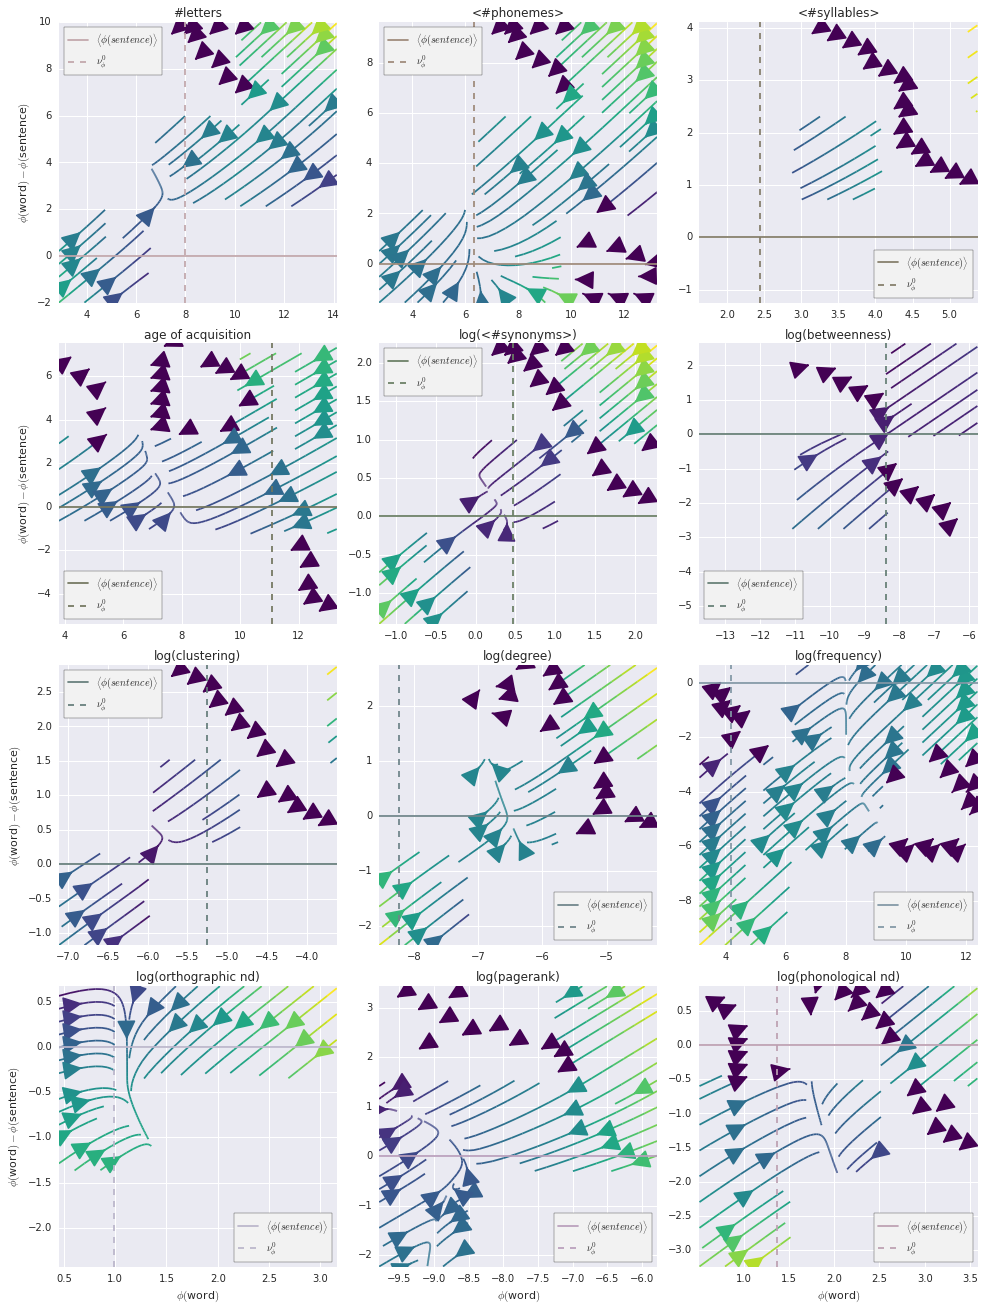

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


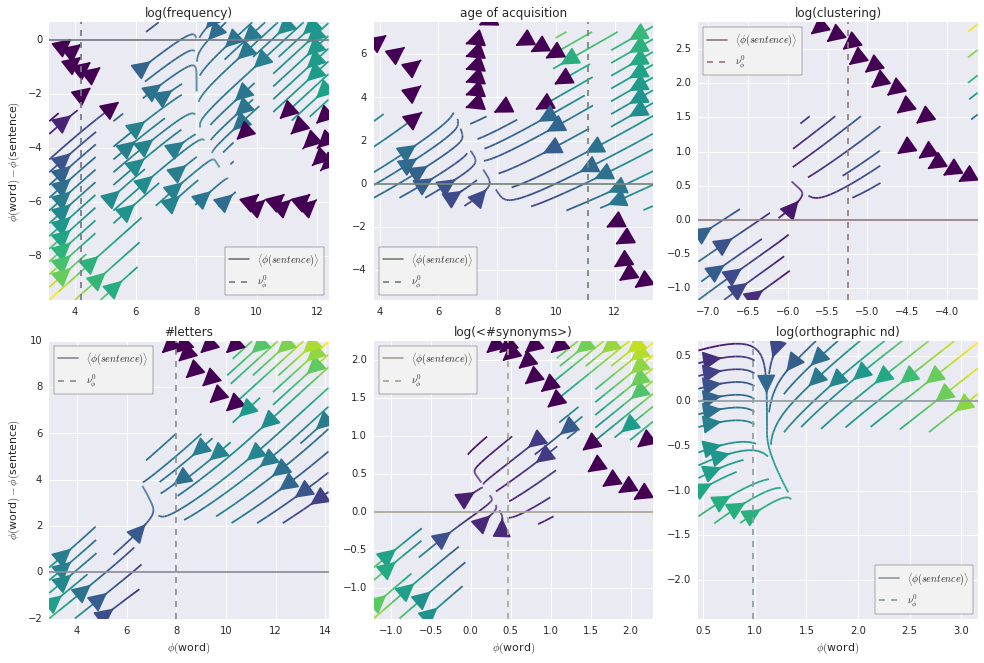

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51786487  0.17388159  0.08890802  0.07508941  0.03518086  0.03013275
  0.02110013  0.01877856  0.01680934  0.0097375   0.00739816]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.442412,0.317401,-0.087970,0.250589,0.253772,-0.421929,0.225935,0.300588,-0.384290,0.283213,-0.145876,-0.001686
Component-1,0.267895,-0.388741,0.124541,-0.280744,-0.293438,-0.425413,0.190106,-0.303450,-0.436118,0.263697,-0.165862,0.015354
Component-2,0.717075,0.140934,-0.115671,0.055199,0.651838,-0.107659,-0.033700,0.002848,-0.060739,0.071341,-0.005332,-0.055494


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 14308) |            | Elapsed Time: 0:00:50 ETA:  8 days, 8:06:18

  0% (   81 of 14308) |                    | Elapsed Time: 0:00:51 ETA:  0:02:08

  1% (  179 of 14308) |                    | Elapsed Time: 0:00:52 ETA:  0:01:40

  2% (  289 of 14308) |                    | Elapsed Time: 0:00:53 ETA:  0:01:31

  2% (  358 of 14308) |                    | Elapsed Time: 0:00:53 ETA:  0:01:29

  3% (  452 of 14308) |                    | Elapsed Time: 0:00:54 ETA:  0:01:30

  3% (  537 of 14308) |                    | Elapsed Time: 0:00:55 ETA:  0:01:33

  4% (  649 of 14308) |                    | Elapsed Time: 0:00:56 ETA:  0:01:28

  5% (  716 of 14308) |#                   | Elapsed Time: 0:00:57 ETA:  0:01:33

  5% (  783 of 14308) |#                   | Elapsed Time: 0:00:58 ETA:  0:01:37

  5% (  851 of 14308) |#                   | Elapsed Time: 0:00:59 ETA:  0:01:39

  6% (  895 of 14308) |#                   | Elapsed Time: 0:01:00 ETA:  0:01:44

  6% (  977 of 14308) |#                   | Elapsed Time: 0:01:01 ETA:  0:01:50

  7% ( 1050 of 14308) |#                   | Elapsed Time: 0:01:02 ETA:  0:01:55

  7% ( 1074 of 14308) |#                   | Elapsed Time: 0:01:02 ETA:  0:02:01

  8% ( 1147 of 14308) |#                   | Elapsed Time: 0:01:03 ETA:  0:02:04

  8% ( 1230 of 14308) |#                   | Elapsed Time: 0:01:04 ETA:  0:02:12

  8% ( 1252 of 14308) |#                   | Elapsed Time: 0:01:05 ETA:  0:02:10

  9% ( 1318 of 14308) |#                   | Elapsed Time: 0:01:06 ETA:  0:02:10

  9% ( 1371 of 14308) |#                   | Elapsed Time: 0:01:07 ETA:  0:02:15

 10% ( 1431 of 14308) |##                  | Elapsed Time: 0:01:08 ETA:  0:02:14

 10% ( 1531 of 14308) |##                  | Elapsed Time: 0:01:09 ETA:  0:02:07

 11% ( 1610 of 14308) |##                  | Elapsed Time: 0:01:10 ETA:  0:02:03

 11% ( 1693 of 14308) |##                  | Elapsed Time: 0:01:11 ETA:  0:01:58

 12% ( 1789 of 14308) |##                  | Elapsed Time: 0:01:12 ETA:  0:01:49

 13% ( 1877 of 14308) |##                  | Elapsed Time: 0:01:13 ETA:  0:01:47

 13% ( 1938 of 14308) |##                  | Elapsed Time: 0:01:14 ETA:  0:01:51

 13% ( 1968 of 14308) |##                  | Elapsed Time: 0:01:14 ETA:  0:01:48

 14% ( 2055 of 14308) |##                  | Elapsed Time: 0:01:15 ETA:  0:01:38

 15% ( 2147 of 14308) |###                 | Elapsed Time: 0:01:16 ETA:  0:01:38

 15% ( 2233 of 14308) |###                 | Elapsed Time: 0:01:17 ETA:  0:01:35

 16% ( 2326 of 14308) |###                 | Elapsed Time: 0:01:18 ETA:  0:01:39

 16% ( 2422 of 14308) |###                 | Elapsed Time: 0:01:19 ETA:  0:01:35

 17% ( 2504 of 14308) |###                 | Elapsed Time: 0:01:20 ETA:  0:01:23

 18% ( 2598 of 14308) |###                 | Elapsed Time: 0:01:21 ETA:  0:01:18

 18% ( 2683 of 14308) |###                 | Elapsed Time: 0:01:22 ETA:  0:01:10

 19% ( 2781 of 14308) |###                 | Elapsed Time: 0:01:23 ETA:  0:01:06

 19% ( 2839 of 14308) |###                 | Elapsed Time: 0:01:24 ETA:  0:01:14

 20% ( 2862 of 14308) |####                | Elapsed Time: 0:01:24 ETA:  0:01:15

 20% ( 2965 of 14308) |####                | Elapsed Time: 0:01:25 ETA:  0:01:09

 21% ( 3041 of 14308) |####                | Elapsed Time: 0:01:26 ETA:  0:01:04

 22% ( 3160 of 14308) |####                | Elapsed Time: 0:01:27 ETA:  0:00:58

 22% ( 3220 of 14308) |####                | Elapsed Time: 0:01:27 ETA:  0:00:56

 23% ( 3311 of 14308) |####                | Elapsed Time: 0:01:28 ETA:  0:00:56

 23% ( 3399 of 14308) |####                | Elapsed Time: 0:01:29 ETA:  0:01:02

 24% ( 3481 of 14308) |####                | Elapsed Time: 0:01:30 ETA:  0:00:55

 25% ( 3577 of 14308) |#####               | Elapsed Time: 0:01:31 ETA:  0:00:54

 25% ( 3697 of 14308) |#####               | Elapsed Time: 0:01:32 ETA:  0:00:51

 26% ( 3756 of 14308) |#####               | Elapsed Time: 0:01:33 ETA:  0:00:56

 26% ( 3849 of 14308) |#####               | Elapsed Time: 0:01:34 ETA:  0:00:58

 27% ( 3935 of 14308) |#####               | Elapsed Time: 0:01:35 ETA:  0:00:58

 28% ( 4046 of 14308) |#####               | Elapsed Time: 0:01:36 ETA:  0:00:51

 28% ( 4114 of 14308) |#####               | Elapsed Time: 0:01:37 ETA:  0:00:49

 29% ( 4212 of 14308) |#####               | Elapsed Time: 0:01:38 ETA:  0:00:45

 30% ( 4293 of 14308) |######              | Elapsed Time: 0:01:39 ETA:  0:00:42

 30% ( 4385 of 14308) |######              | Elapsed Time: 0:01:40 ETA:  0:00:43

 31% ( 4472 of 14308) |######              | Elapsed Time: 0:01:41 ETA:  0:00:47

 31% ( 4577 of 14308) |######              | Elapsed Time: 0:01:42 ETA:  0:00:44

 32% ( 4651 of 14308) |######              | Elapsed Time: 0:01:42 ETA:  0:00:45

 33% ( 4752 of 14308) |######              | Elapsed Time: 0:01:43 ETA:  0:00:42

 33% ( 4829 of 14308) |######              | Elapsed Time: 0:01:44 ETA:  0:00:42

 34% ( 4921 of 14308) |######              | Elapsed Time: 0:01:45 ETA:  0:00:43

 34% ( 4982 of 14308) |######              | Elapsed Time: 0:01:46 ETA:  0:00:49

 35% ( 5008 of 14308) |#######             | Elapsed Time: 0:01:47 ETA:  0:00:53

 35% ( 5097 of 14308) |#######             | Elapsed Time: 0:01:48 ETA:  0:00:53

 36% ( 5187 of 14308) |#######             | Elapsed Time: 0:01:49 ETA:  0:00:50

 36% ( 5289 of 14308) |#######             | Elapsed Time: 0:01:50 ETA:  0:00:50

 37% ( 5343 of 14308) |#######             | Elapsed Time: 0:01:51 ETA:  0:00:56

 37% ( 5366 of 14308) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:00

 38% ( 5467 of 14308) |#######             | Elapsed Time: 0:01:52 ETA:  0:00:59

 38% ( 5545 of 14308) |#######             | Elapsed Time: 0:01:53 ETA:  0:00:57

 39% ( 5639 of 14308) |#######             | Elapsed Time: 0:01:54 ETA:  0:00:48

 40% ( 5724 of 14308) |########            | Elapsed Time: 0:01:54 ETA:  0:00:40

 40% ( 5816 of 14308) |########            | Elapsed Time: 0:01:55 ETA:  0:00:38

 41% ( 5903 of 14308) |########            | Elapsed Time: 0:01:56 ETA:  0:00:40

 41% ( 5985 of 14308) |########            | Elapsed Time: 0:01:57 ETA:  0:00:43

 42% ( 6081 of 14308) |########            | Elapsed Time: 0:01:59 ETA:  0:00:36

 43% ( 6188 of 14308) |########            | Elapsed Time: 0:02:00 ETA:  0:00:34

 43% ( 6260 of 14308) |########            | Elapsed Time: 0:02:00 ETA:  0:00:32

 44% ( 6354 of 14308) |########            | Elapsed Time: 0:02:01 ETA:  0:00:31

 45% ( 6439 of 14308) |#########           | Elapsed Time: 0:02:02 ETA:  0:00:34

 45% ( 6518 of 14308) |#########           | Elapsed Time: 0:02:03 ETA:  0:00:36

 46% ( 6618 of 14308) |#########           | Elapsed Time: 0:02:04 ETA:  0:00:31

 46% ( 6702 of 14308) |#########           | Elapsed Time: 0:02:05 ETA:  0:00:28

 47% ( 6776 of 14308) |#########           | Elapsed Time: 0:02:06 ETA:  0:00:32

 47% ( 6797 of 14308) |#########           | Elapsed Time: 0:02:07 ETA:  0:00:37

 48% ( 6880 of 14308) |#########           | Elapsed Time: 0:02:08 ETA:  0:00:40

 48% ( 6956 of 14308) |#########           | Elapsed Time: 0:02:09 ETA:  0:00:44

 48% ( 6976 of 14308) |#########           | Elapsed Time: 0:02:09 ETA:  0:00:47

 49% ( 7067 of 14308) |#########           | Elapsed Time: 0:02:10 ETA:  0:00:42

 50% ( 7154 of 14308) |##########          | Elapsed Time: 0:02:11 ETA:  0:00:49

 50% ( 7245 of 14308) |##########          | Elapsed Time: 0:02:12 ETA:  0:00:46

 50% ( 7283 of 14308) |##########          | Elapsed Time: 0:02:13 ETA:  0:00:57

 51% ( 7333 of 14308) |##########          | Elapsed Time: 0:02:14 ETA:  0:00:56

 51% ( 7420 of 14308) |##########          | Elapsed Time: 0:02:15 ETA:  0:00:53

 52% ( 7512 of 14308) |##########          | Elapsed Time: 0:02:16 ETA:  0:00:49

 53% ( 7595 of 14308) |##########          | Elapsed Time: 0:02:17 ETA:  0:00:51

 53% ( 7670 of 14308) |##########          | Elapsed Time: 0:02:18 ETA:  0:00:49

 53% ( 7691 of 14308) |##########          | Elapsed Time: 0:02:18 ETA:  0:00:51

 54% ( 7764 of 14308) |##########          | Elapsed Time: 0:02:19 ETA:  0:00:56

 54% ( 7853 of 14308) |##########          | Elapsed Time: 0:02:20 ETA:  0:00:38

 55% ( 7870 of 14308) |###########         | Elapsed Time: 0:02:20 ETA:  0:00:38

 55% ( 7948 of 14308) |###########         | Elapsed Time: 0:02:21 ETA:  0:00:40

 55% ( 7998 of 14308) |###########         | Elapsed Time: 0:02:22 ETA:  0:00:51

 56% ( 8049 of 14308) |###########         | Elapsed Time: 0:02:23 ETA:  0:00:53

 56% ( 8128 of 14308) |###########         | Elapsed Time: 0:02:24 ETA:  0:00:53

 57% ( 8228 of 14308) |###########         | Elapsed Time: 0:02:25 ETA:  0:00:45

 58% ( 8321 of 14308) |###########         | Elapsed Time: 0:02:26 ETA:  0:00:37

 58% ( 8374 of 14308) |###########         | Elapsed Time: 0:02:27 ETA:  0:00:49

 58% ( 8406 of 14308) |###########         | Elapsed Time: 0:02:28 ETA:  0:00:57

 59% ( 8471 of 14308) |###########         | Elapsed Time: 0:02:29 ETA:  0:01:01

 59% ( 8539 of 14308) |###########         | Elapsed Time: 0:02:30 ETA:  0:00:53

 60% ( 8585 of 14308) |############        | Elapsed Time: 0:02:31 ETA:  0:00:50

 60% ( 8647 of 14308) |############        | Elapsed Time: 0:02:32 ETA:  0:00:55

 60% ( 8716 of 14308) |############        | Elapsed Time: 0:02:33 ETA:  0:01:01

 61% ( 8764 of 14308) |############        | Elapsed Time: 0:02:33 ETA:  0:00:58

 61% ( 8857 of 14308) |############        | Elapsed Time: 0:02:34 ETA:  0:00:57

 62% ( 8943 of 14308) |############        | Elapsed Time: 0:02:35 ETA:  0:00:38

 63% ( 9022 of 14308) |############        | Elapsed Time: 0:02:36 ETA:  0:00:32

 63% ( 9104 of 14308) |############        | Elapsed Time: 0:02:37 ETA:  0:00:26

 63% ( 9122 of 14308) |############        | Elapsed Time: 0:02:38 ETA:  0:00:26

 64% ( 9205 of 14308) |############        | Elapsed Time: 0:02:39 ETA:  0:00:18

 64% ( 9284 of 14308) |############        | Elapsed Time: 0:02:40 ETA:  0:00:13

 65% ( 9301 of 14308) |#############       | Elapsed Time: 0:02:40 ETA:  0:00:15

 65% ( 9375 of 14308) |#############       | Elapsed Time: 0:02:41 ETA:  0:00:21

 66% ( 9462 of 14308) |#############       | Elapsed Time: 0:02:42 ETA:  0:00:16

 66% ( 9480 of 14308) |#############       | Elapsed Time: 0:02:42 ETA:  0:00:16

 66% ( 9567 of 14308) |#############       | Elapsed Time: 0:02:43 ETA:  0:00:13

 67% ( 9658 of 14308) |#############       | Elapsed Time: 0:02:44 ETA:  0:00:09

 68% ( 9731 of 14308) |#############       | Elapsed Time: 0:02:45 ETA:  0:00:12

 68% ( 9820 of 14308) |#############       | Elapsed Time: 0:02:46 ETA:  0:00:07

 68% ( 9837 of 14308) |#############       | Elapsed Time: 0:02:46 ETA:  0:00:07

 69% ( 9916 of 14308) |#############       | Elapsed Time: 0:02:47 ETA:  0:00:04

 70% (10016 of 14308) |##############      | Elapsed Time: 0:02:49 ETA:  0:00:05

 70% (10091 of 14308) |##############      | Elapsed Time: 0:02:50 ETA:  0:00:08

 71% (10169 of 14308) |##############      | Elapsed Time: 0:02:51 ETA:  0:00:11

 71% (10195 of 14308) |##############      | Elapsed Time: 0:02:51 ETA:  0:00:15

 71% (10269 of 14308) |##############      | Elapsed Time: 0:02:52 ETA:  0:00:14

 72% (10343 of 14308) |##############      | Elapsed Time: 0:02:53 ETA:  0:00:18

 72% (10374 of 14308) |##############      | Elapsed Time: 0:02:54 ETA:  0:00:15

 72% (10443 of 14308) |##############      | Elapsed Time: 0:02:55 ETA:  0:00:17

 73% (10517 of 14308) |##############      | Elapsed Time: 0:02:56 ETA:  0:00:20

 73% (10553 of 14308) |##############      | Elapsed Time: 0:02:56 ETA:  0:00:19

 74% (10637 of 14308) |##############      | Elapsed Time: 0:02:57 ETA:  0:00:14

 74% (10706 of 14308) |##############      | Elapsed Time: 0:02:58 ETA:  0:00:16

 75% (10731 of 14308) |###############     | Elapsed Time: 0:02:58 ETA:  0:00:12

 75% (10805 of 14308) |###############     | Elapsed Time: 0:02:59 ETA:  0:00:11

 76% (10876 of 14308) |###############     | Elapsed Time: 0:03:00 ETA:  0:00:11

 76% (10910 of 14308) |###############     | Elapsed Time: 0:03:01 ETA:  0:00:15

 76% (10992 of 14308) |###############     | Elapsed Time: 0:03:02 ETA:  0:00:09

 77% (11066 of 14308) |###############     | Elapsed Time: 0:03:03 ETA:  0:00:08

 77% (11089 of 14308) |###############     | Elapsed Time: 0:03:03 ETA:  0:00:08

 78% (11161 of 14308) |###############     | Elapsed Time: 0:03:04 ETA:  0:00:11

 78% (11228 of 14308) |###############     | Elapsed Time: 0:03:05 ETA:  0:00:10

 78% (11268 of 14308) |###############     | Elapsed Time: 0:03:06 ETA:  0:00:09

 79% (11337 of 14308) |###############     | Elapsed Time: 0:03:07 ETA:  0:00:09

 79% (11404 of 14308) |###############     | Elapsed Time: 0:03:08 ETA:  0:00:10

 80% (11447 of 14308) |################    | Elapsed Time: 0:03:08 ETA:  0:00:05

 80% (11535 of 14308) |################    | Elapsed Time: 0:03:09 ETA:  0:00:02

 81% (11626 of 14308) |################    | Elapsed Time: 0:03:10 ETA:  0:00:00

 81% (11719 of 14308) |################    | Elapsed Time: 0:03:11 ETA:  0:00:00

 82% (11805 of 14308) |################    | Elapsed Time: 0:03:12 ETA:  0:00:00

 83% (11879 of 14308) |################    | Elapsed Time: 0:03:13 ETA:  0:00:00

 83% (11957 of 14308) |################    | Elapsed Time: 0:03:14 ETA:  0:00:00

 83% (11983 of 14308) |################    | Elapsed Time: 0:03:15 ETA:  0:00:00

 84% (12065 of 14308) |################    | Elapsed Time: 0:03:16 ETA:  0:00:00

 84% (12139 of 14308) |################    | Elapsed Time: 0:03:17 ETA:  0:00:00

 85% (12162 of 14308) |#################   | Elapsed Time: 0:03:17 ETA:  0:00:00

 85% (12252 of 14308) |#################   | Elapsed Time: 0:03:18 ETA:  0:00:00

 86% (12341 of 14308) |#################   | Elapsed Time: 0:03:19 ETA:  0:00:00

 86% (12428 of 14308) |#################   | Elapsed Time: 0:03:20 ETA:  0:00:00

 87% (12520 of 14308) |#################   | Elapsed Time: 0:03:22 ETA:  0:00:00

 88% (12597 of 14308) |#################   | Elapsed Time: 0:03:23 ETA:  0:00:00

 88% (12675 of 14308) |#################   | Elapsed Time: 0:03:24 ETA:  0:00:00

 88% (12699 of 14308) |#################   | Elapsed Time: 0:03:24 ETA:  0:00:00

 89% (12769 of 14308) |#################   | Elapsed Time: 0:03:25 ETA:  0:00:00

 89% (12855 of 14308) |#################   | Elapsed Time: 0:03:26 ETA:  0:00:00

 90% (12878 of 14308) |##################  | Elapsed Time: 0:03:26 ETA:  0:00:00

 90% (12950 of 14308) |##################  | Elapsed Time: 0:03:27 ETA:  0:00:00

 91% (13021 of 14308) |##################  | Elapsed Time: 0:03:28 ETA:  0:00:00

 91% (13057 of 14308) |##################  | Elapsed Time: 0:03:29 ETA:  0:00:00

 91% (13147 of 14308) |##################  | Elapsed Time: 0:03:30 ETA:  0:00:00

 92% (13206 of 14308) |##################  | Elapsed Time: 0:03:31 ETA:  0:00:00

 92% (13235 of 14308) |##################  | Elapsed Time: 0:03:31 ETA:  0:00:00

 93% (13308 of 14308) |##################  | Elapsed Time: 0:03:32 ETA:  0:00:00

 93% (13389 of 14308) |##################  | Elapsed Time: 0:03:33 ETA:  0:00:00

 93% (13414 of 14308) |##################  | Elapsed Time: 0:03:34 ETA:  0:00:00

 94% (13505 of 14308) |##################  | Elapsed Time: 0:03:35 ETA:  0:00:00

 95% (13593 of 14308) |################### | Elapsed Time: 0:03:36 ETA:  0:00:00

 95% (13682 of 14308) |################### | Elapsed Time: 0:03:37 ETA:  0:00:00

 96% (13749 of 14308) |################### | Elapsed Time: 0:03:38 ETA:  0:00:00

 96% (13772 of 14308) |################### | Elapsed Time: 0:03:38 ETA:  0:00:00

 96% (13835 of 14308) |################### | Elapsed Time: 0:03:39 ETA:  0:00:00

 97% (13924 of 14308) |################### | Elapsed Time: 0:03:40 ETA:  0:00:00

 97% (13951 of 14308) |################### | Elapsed Time: 0:03:41 ETA:  0:00:00

 98% (14033 of 14308) |################### | Elapsed Time: 0:03:42 ETA:  0:00:00

 98% (14109 of 14308) |################### | Elapsed Time: 0:03:43 ETA:  0:00:00

 98% (14130 of 14308) |################### | Elapsed Time: 0:03:43 ETA:  0:00:00

 99% (14215 of 14308) |################### | Elapsed Time: 0:03:44 ETA:  0:00:00

100% (14308 of 14308) |####################| Elapsed Time: 0:03:45 Time: 0:03:45


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

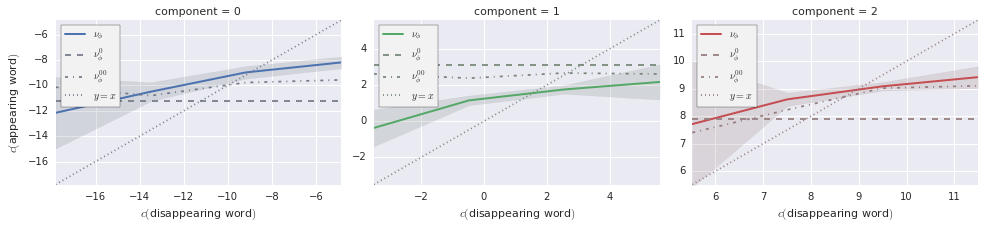

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 4 components.

Those explain the following variance:
[ 0.54390271  0.18117875  0.16160004  0.0449155 ]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.671923,-0.096668,0.374997,-0.558234,0.294808,0.003862
Component-1,0.376870,0.104360,-0.543722,-0.681924,0.293702,-0.012768
Component-2,-0.629087,0.095437,-0.730617,0.240097,-0.019287,0.057634


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 14308) |           | Elapsed Time: 0:00:17 ETA:  2 days, 21:11:31

  0% (   78 of 14308) |                    | Elapsed Time: 0:00:18 ETA:  0:02:48

  1% (  179 of 14308) |                    | Elapsed Time: 0:00:19 ETA:  0:02:27

  1% (  268 of 14308) |                    | Elapsed Time: 0:00:20 ETA:  0:02:24

  2% (  358 of 14308) |                    | Elapsed Time: 0:00:21 ETA:  0:02:19

  3% (  446 of 14308) |                    | Elapsed Time: 0:00:22 ETA:  0:02:18

  3% (  537 of 14308) |                    | Elapsed Time: 0:00:23 ETA:  0:02:17

  4% (  644 of 14308) |                    | Elapsed Time: 0:00:24 ETA:  0:02:12

  5% (  716 of 14308) |#                   | Elapsed Time: 0:00:25 ETA:  0:02:12

  5% (  789 of 14308) |#                   | Elapsed Time: 0:00:26 ETA:  0:02:17

  5% (  856 of 14308) |#                   | Elapsed Time: 0:00:27 ETA:  0:02:21

  6% (  895 of 14308) |#                   | Elapsed Time: 0:00:28 ETA:  0:02:24

  6% (  972 of 14308) |#                   | Elapsed Time: 0:00:29 ETA:  0:02:29

  7% ( 1054 of 14308) |#                   | Elapsed Time: 0:00:30 ETA:  0:02:29

  7% ( 1074 of 14308) |#                   | Elapsed Time: 0:00:30 ETA:  0:02:32

  8% ( 1173 of 14308) |#                   | Elapsed Time: 0:00:31 ETA:  0:02:25

  8% ( 1252 of 14308) |#                   | Elapsed Time: 0:00:32 ETA:  0:02:27

  9% ( 1342 of 14308) |#                   | Elapsed Time: 0:00:33 ETA:  0:02:20

 10% ( 1431 of 14308) |##                  | Elapsed Time: 0:00:34 ETA:  0:02:12

 10% ( 1525 of 14308) |##                  | Elapsed Time: 0:00:35 ETA:  0:02:06

 11% ( 1610 of 14308) |##                  | Elapsed Time: 0:00:36 ETA:  0:02:01

 11% ( 1701 of 14308) |##                  | Elapsed Time: 0:00:37 ETA:  0:02:00

 12% ( 1789 of 14308) |##                  | Elapsed Time: 0:00:38 ETA:  0:01:59

 13% ( 1877 of 14308) |##                  | Elapsed Time: 0:00:39 ETA:  0:02:02

 13% ( 1944 of 14308) |##                  | Elapsed Time: 0:00:40 ETA:  0:02:07

 13% ( 1968 of 14308) |##                  | Elapsed Time: 0:00:40 ETA:  0:02:08

 14% ( 2059 of 14308) |##                  | Elapsed Time: 0:00:41 ETA:  0:02:05

 15% ( 2147 of 14308) |###                 | Elapsed Time: 0:00:42 ETA:  0:02:04

 15% ( 2238 of 14308) |###                 | Elapsed Time: 0:00:43 ETA:  0:02:01

 16% ( 2326 of 14308) |###                 | Elapsed Time: 0:00:44 ETA:  0:01:59

 16% ( 2417 of 14308) |###                 | Elapsed Time: 0:00:45 ETA:  0:01:58

 17% ( 2504 of 14308) |###                 | Elapsed Time: 0:00:46 ETA:  0:01:58

 18% ( 2597 of 14308) |###                 | Elapsed Time: 0:00:47 ETA:  0:01:55

 18% ( 2683 of 14308) |###                 | Elapsed Time: 0:00:48 ETA:  0:01:48

 19% ( 2779 of 14308) |###                 | Elapsed Time: 0:00:49 ETA:  0:01:44

 19% ( 2841 of 14308) |###                 | Elapsed Time: 0:00:50 ETA:  0:01:49

 20% ( 2862 of 14308) |####                | Elapsed Time: 0:00:50 ETA:  0:01:51

 20% ( 2961 of 14308) |####                | Elapsed Time: 0:00:51 ETA:  0:01:48

 21% ( 3041 of 14308) |####                | Elapsed Time: 0:00:52 ETA:  0:01:48

 22% ( 3151 of 14308) |####                | Elapsed Time: 0:00:53 ETA:  0:01:43

 22% ( 3220 of 14308) |####                | Elapsed Time: 0:00:54 ETA:  0:01:40

 23% ( 3311 of 14308) |####                | Elapsed Time: 0:00:55 ETA:  0:01:40

 23% ( 3399 of 14308) |####                | Elapsed Time: 0:00:56 ETA:  0:01:43

 24% ( 3493 of 14308) |####                | Elapsed Time: 0:00:57 ETA:  0:01:34

 25% ( 3577 of 14308) |#####               | Elapsed Time: 0:00:58 ETA:  0:01:33

 25% ( 3674 of 14308) |#####               | Elapsed Time: 0:00:59 ETA:  0:01:32

 26% ( 3756 of 14308) |#####               | Elapsed Time: 0:00:59 ETA:  0:01:28

 26% ( 3847 of 14308) |#####               | Elapsed Time: 0:01:00 ETA:  0:01:31

 27% ( 3935 of 14308) |#####               | Elapsed Time: 0:01:01 ETA:  0:01:33

 28% ( 4036 of 14308) |#####               | Elapsed Time: 0:01:02 ETA:  0:01:30

 28% ( 4114 of 14308) |#####               | Elapsed Time: 0:01:03 ETA:  0:01:28

 29% ( 4203 of 14308) |#####               | Elapsed Time: 0:01:04 ETA:  0:01:28

 30% ( 4293 of 14308) |######              | Elapsed Time: 0:01:05 ETA:  0:01:26

 30% ( 4382 of 14308) |######              | Elapsed Time: 0:01:06 ETA:  0:01:25

 31% ( 4472 of 14308) |######              | Elapsed Time: 0:01:07 ETA:  0:01:25

 31% ( 4570 of 14308) |######              | Elapsed Time: 0:01:08 ETA:  0:01:25

 32% ( 4651 of 14308) |######              | Elapsed Time: 0:01:09 ETA:  0:01:25

 33% ( 4747 of 14308) |######              | Elapsed Time: 0:01:10 ETA:  0:01:22

 33% ( 4829 of 14308) |######              | Elapsed Time: 0:01:11 ETA:  0:01:22

 34% ( 4922 of 14308) |######              | Elapsed Time: 0:01:12 ETA:  0:01:20

 34% ( 4980 of 14308) |######              | Elapsed Time: 0:01:13 ETA:  0:01:25

 35% ( 5008 of 14308) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:29

 35% ( 5096 of 14308) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:29

 36% ( 5187 of 14308) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:33

 36% ( 5268 of 14308) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:33

 37% ( 5334 of 14308) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:41

 37% ( 5366 of 14308) |#######             | Elapsed Time: 0:01:18 ETA:  0:01:47

 38% ( 5461 of 14308) |#######             | Elapsed Time: 0:01:19 ETA:  0:01:45

 38% ( 5545 of 14308) |#######             | Elapsed Time: 0:01:20 ETA:  0:01:34

 39% ( 5635 of 14308) |#######             | Elapsed Time: 0:01:21 ETA:  0:01:28

 40% ( 5724 of 14308) |########            | Elapsed Time: 0:01:22 ETA:  0:01:26

 40% ( 5812 of 14308) |########            | Elapsed Time: 0:01:23 ETA:  0:01:25

 41% ( 5903 of 14308) |########            | Elapsed Time: 0:01:24 ETA:  0:01:22

 41% ( 5990 of 14308) |########            | Elapsed Time: 0:01:25 ETA:  0:01:19

 42% ( 6081 of 14308) |########            | Elapsed Time: 0:01:26 ETA:  0:01:14

 43% ( 6178 of 14308) |########            | Elapsed Time: 0:01:27 ETA:  0:01:12

 43% ( 6260 of 14308) |########            | Elapsed Time: 0:01:28 ETA:  0:01:11

 44% ( 6344 of 14308) |########            | Elapsed Time: 0:01:29 ETA:  0:01:11

 45% ( 6439 of 14308) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:12

 45% ( 6528 of 14308) |#########           | Elapsed Time: 0:01:31 ETA:  0:01:12

 46% ( 6618 of 14308) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:10

 46% ( 6707 of 14308) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:06

 47% ( 6797 of 14308) |#########           | Elapsed Time: 0:01:34 ETA:  0:01:10

 48% ( 6892 of 14308) |#########           | Elapsed Time: 0:01:35 ETA:  0:01:08

 48% ( 6976 of 14308) |#########           | Elapsed Time: 0:01:36 ETA:  0:01:07

 49% ( 7064 of 14308) |#########           | Elapsed Time: 0:01:37 ETA:  0:01:07

 50% ( 7154 of 14308) |##########          | Elapsed Time: 0:01:38 ETA:  0:01:12

 50% ( 7251 of 14308) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:09

 51% ( 7333 of 14308) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:09

 51% ( 7436 of 14308) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:06

 52% ( 7512 of 14308) |##########          | Elapsed Time: 0:01:42 ETA:  0:01:00

 52% ( 7514 of 14308) |##########          | Elapsed Time: 0:01:46 ETA:  0:02:43

 53% ( 7604 of 14308) |##########          | Elapsed Time: 0:01:47 ETA:  0:02:41

 53% ( 7691 of 14308) |##########          | Elapsed Time: 0:01:48 ETA:  0:02:33

 54% ( 7779 of 14308) |##########          | Elapsed Time: 0:01:49 ETA:  0:02:20

 55% ( 7870 of 14308) |###########         | Elapsed Time: 0:01:50 ETA:  0:02:20

 55% ( 7962 of 14308) |###########         | Elapsed Time: 0:01:51 ETA:  0:02:11

 56% ( 8024 of 14308) |###########         | Elapsed Time: 0:01:52 ETA:  0:02:11

 56% ( 8049 of 14308) |###########         | Elapsed Time: 0:01:53 ETA:  0:02:26

 56% ( 8143 of 14308) |###########         | Elapsed Time: 0:01:54 ETA:  0:02:22

 57% ( 8228 of 14308) |###########         | Elapsed Time: 0:01:54 ETA:  0:00:48

 58% ( 8329 of 14308) |###########         | Elapsed Time: 0:01:55 ETA:  0:00:45

 58% ( 8387 of 14308) |###########         | Elapsed Time: 0:01:56 ETA:  0:00:51

 58% ( 8406 of 14308) |###########         | Elapsed Time: 0:01:57 ETA:  0:00:53

 59% ( 8495 of 14308) |###########         | Elapsed Time: 0:01:58 ETA:  0:00:54

 60% ( 8585 of 14308) |############        | Elapsed Time: 0:01:59 ETA:  0:00:48

 60% ( 8658 of 14308) |############        | Elapsed Time: 0:02:00 ETA:  0:00:50

 61% ( 8764 of 14308) |############        | Elapsed Time: 0:02:01 ETA:  0:00:54

 61% ( 8864 of 14308) |############        | Elapsed Time: 0:02:02 ETA:  0:00:54

 62% ( 8943 of 14308) |############        | Elapsed Time: 0:02:03 ETA:  0:00:41

 63% ( 9037 of 14308) |############        | Elapsed Time: 0:02:04 ETA:  0:00:36

 63% ( 9122 of 14308) |############        | Elapsed Time: 0:02:05 ETA:  0:00:31

 64% ( 9223 of 14308) |############        | Elapsed Time: 0:02:06 ETA:  0:00:27

 65% ( 9301 of 14308) |#############       | Elapsed Time: 0:02:07 ETA:  0:00:27

 65% ( 9381 of 14308) |#############       | Elapsed Time: 0:02:08 ETA:  0:00:25

 66% ( 9480 of 14308) |#############       | Elapsed Time: 0:02:09 ETA:  0:00:22

 66% ( 9576 of 14308) |#############       | Elapsed Time: 0:02:10 ETA:  0:00:22

 67% ( 9658 of 14308) |#############       | Elapsed Time: 0:02:11 ETA:  0:00:23

 68% ( 9749 of 14308) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:22

 68% ( 9837 of 14308) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:23

 69% ( 9933 of 14308) |#############       | Elapsed Time: 0:02:13 ETA:  0:00:22

 70% (10016 of 14308) |##############      | Elapsed Time: 0:02:14 ETA:  0:00:20

 70% (10101 of 14308) |##############      | Elapsed Time: 0:02:15 ETA:  0:00:18

 71% (10195 of 14308) |##############      | Elapsed Time: 0:02:16 ETA:  0:00:19

 71% (10286 of 14308) |##############      | Elapsed Time: 0:02:17 ETA:  0:00:19

 72% (10374 of 14308) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:17

 73% (10461 of 14308) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:17

 73% (10553 of 14308) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:17

 74% (10652 of 14308) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:16

 75% (10731 of 14308) |###############     | Elapsed Time: 0:02:22 ETA:  0:00:15

 75% (10823 of 14308) |###############     | Elapsed Time: 0:02:23 ETA:  0:00:12

 76% (10910 of 14308) |###############     | Elapsed Time: 0:02:24 ETA:  0:00:09

 76% (11014 of 14308) |###############     | Elapsed Time: 0:02:25 ETA:  0:00:06

 77% (11089 of 14308) |###############     | Elapsed Time: 0:02:26 ETA:  0:00:03

 78% (11181 of 14308) |###############     | Elapsed Time: 0:02:27 ETA:  0:00:03

 78% (11268 of 14308) |###############     | Elapsed Time: 0:02:28 ETA:  0:00:01

 79% (11358 of 14308) |###############     | Elapsed Time: 0:02:29 ETA:  0:00:01

 80% (11447 of 14308) |################    | Elapsed Time: 0:02:30 ETA:  0:00:04

 80% (11538 of 14308) |################    | Elapsed Time: 0:02:31 ETA:  0:00:04

 81% (11626 of 14308) |################    | Elapsed Time: 0:02:32 ETA:  0:00:03

 81% (11724 of 14308) |################    | Elapsed Time: 0:02:33 ETA:  0:00:04

 82% (11805 of 14308) |################    | Elapsed Time: 0:02:34 ETA:  0:00:08

 83% (11899 of 14308) |################    | Elapsed Time: 0:02:35 ETA:  0:00:06

 83% (11983 of 14308) |################    | Elapsed Time: 0:02:36 ETA:  0:00:07

 84% (12068 of 14308) |################    | Elapsed Time: 0:02:37 ETA:  0:00:06

 85% (12162 of 14308) |#################   | Elapsed Time: 0:02:38 ETA:  0:00:06

 85% (12257 of 14308) |#################   | Elapsed Time: 0:02:39 ETA:  0:00:06

 86% (12341 of 14308) |#################   | Elapsed Time: 0:02:40 ETA:  0:00:00

 86% (12433 of 14308) |#################   | Elapsed Time: 0:02:41 ETA:  0:00:00

 87% (12520 of 14308) |#################   | Elapsed Time: 0:02:42 ETA:  0:00:00

 88% (12616 of 14308) |#################   | Elapsed Time: 0:02:43 ETA:  0:00:00

 88% (12699 of 14308) |#################   | Elapsed Time: 0:02:44 ETA:  0:00:00

 89% (12792 of 14308) |#################   | Elapsed Time: 0:02:45 ETA:  0:00:00

 90% (12878 of 14308) |##################  | Elapsed Time: 0:02:46 ETA:  0:00:00

 90% (12954 of 14308) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:00

 91% (13057 of 14308) |##################  | Elapsed Time: 0:02:48 ETA:  0:00:00

 91% (13155 of 14308) |##################  | Elapsed Time: 0:02:49 ETA:  0:00:00

 92% (13235 of 14308) |##################  | Elapsed Time: 0:02:50 ETA:  0:00:00

 93% (13326 of 14308) |##################  | Elapsed Time: 0:02:51 ETA:  0:00:00

 93% (13414 of 14308) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 94% (13520 of 14308) |##################  | Elapsed Time: 0:02:53 ETA:  0:00:00

 95% (13593 of 14308) |################### | Elapsed Time: 0:02:54 ETA:  0:00:00

 95% (13699 of 14308) |################### | Elapsed Time: 0:02:55 ETA:  0:00:00

 96% (13772 of 14308) |################### | Elapsed Time: 0:02:56 ETA:  0:00:00

 96% (13855 of 14308) |################### | Elapsed Time: 0:02:57 ETA:  0:00:00

 97% (13951 of 14308) |################### | Elapsed Time: 0:02:57 ETA:  0:00:00

 98% (14044 of 14308) |################### | Elapsed Time: 0:02:59 ETA:  0:00:00

 98% (14130 of 14308) |################### | Elapsed Time: 0:02:59 ETA:  0:00:00

 99% (14228 of 14308) |################### | Elapsed Time: 0:03:00 ETA:  0:00:00

100% (14308 of 14308) |####################| Elapsed Time: 0:03:01 Time: 0:03:01


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

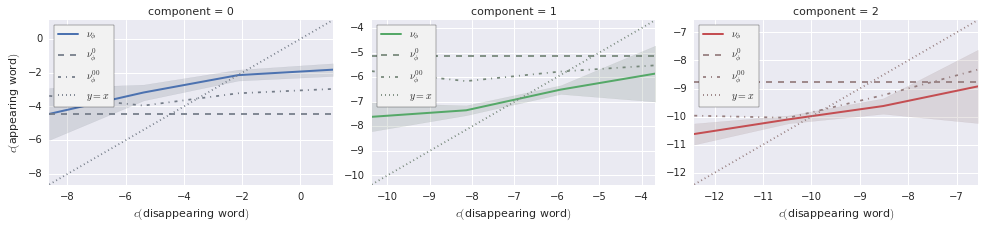

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1311 (cluster-unique) substitutions, but the PCA is in fact computed on 513 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.